1.2 What is Probability Theory?

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Generate the sum of k coin flips, repeat the n times
def generate_counts(k, n):
  x = 2*(random.rand(k,n)>.5)-1 #generate the kxn matrix of +=1 rando
  s = sum(x, axis=0)
  return s

Text(0.5, 1.0, 'Histogram of coin flip when flipping a coin 1000 times')

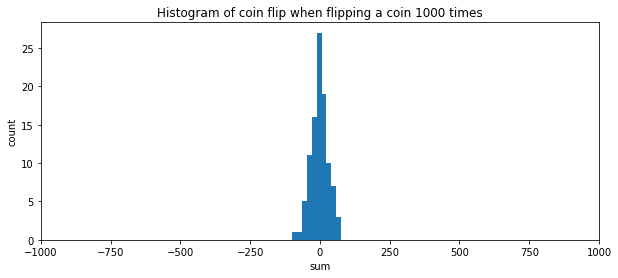

In [16]:
flip = 1000
times = 100
counts = generate_counts(flip, times)
figure(figsize=[10,4])
hist(counts)
xlim([flip*-1, flip])
xlabel('sum')
ylabel('count')
title('Histogram of coin flip when flipping a coin {} times'.format(flip))

Second Simulation - Demonstrating the boundaries of coin flips according to probability theory

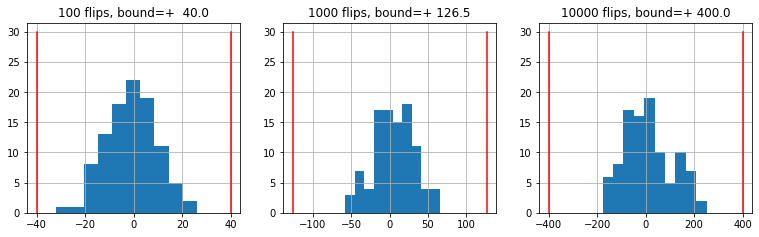

In [21]:
from math import sqrt
figure(figsize=[13,3.5])
for j in range(2,5):
  k = 10**j
  counts = generate_counts(k, 100)
  subplot(130+j-1)
  hist(counts,bins=10)
  d = 4*sqrt(k)
  plot([-d,-d], [0,30], 'r')
  plot([+d,+d], [0,30], 'r')
  grid()
  title('%d flips, bound=+%6.1f'%(k,d))

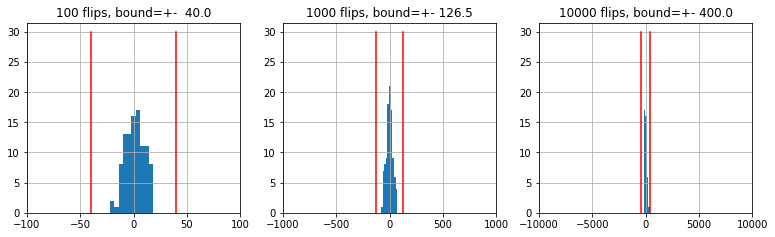

In [22]:
# adding xlim shows the full scale of the distribution from sim 2
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    xlim([-k,k])
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))

1.3 What is Statistics?

In [24]:
#4 times the sqrt of the num of flips
4*sqrt(1000)

126.49110640673517

1.4 A Puzzle

Printing the cards generated and showing the results

In [31]:
red_bck = "\x1b[41m%s\x1b[0m"
blue_bck = "\x1b[44m%s\x1b[0m"
red = red_bck%'R'
black = blue_bck%'B'
cards = [(red,black), (red,red), (black,black)]
counts = {'same':0, 'different':1}
from random import random
for j in range(50):
  i = int(random()*3) # selects a random card
  side = int(random()*2) # selects a side
  c = cards[i]
  if (side==1): #selects which side is up
    c = (c[1], c[0])
  same = 'same' if c[0] == c[1] else 'different' #counts the num of same or dif
  counts[same]+=1
  print(''.join(c)+' %-9s'%same, end='')
  if (j+1)%5==0:
    print()
print()
print(counts)

BB same     BB same     BR differentBB same     RR same     
RB differentRR same     RR same     RB differentBB same     
RR same     BB same     RR same     RR same     RR same     
BB same     RR same     RB differentBB same     BB same     
BB same     RR same     RB differentBB same     RR same     
BB same     RR same     BB same     RB differentRR same     
RB differentBR differentBB same     BR differentRB different
RB differentRR same     BB same     RB differentBB same     
BR differentBB same     BB same     BB same     RB different
BB same     RR same     BB same     RR same     BB same     

{'same': 36, 'different': 15}


In [42]:
import numpy as np

In [45]:
def seq_sum(n):
    """ input: n, generate a sequence of n random coin flips
        output: return the number of heads 
        Hint: For simplicity, use 1,0 to represent head,tails
    """
    x = 2*(np.random.rand(n)>.5)-1
    count = 0
    for i in range(len(x)):
      if x[i] > 0:
        count += 1
    return count

In [ ]:
def estimate_prob(n,k1,k2,m):
    """Estimate the probability that n flips of a fair coin result in k1 to k2 heads
         n: the number of coin flips (length of the sequence)
         k1,k2: the trial is successful if the number of heads is 
                between k1 and k2-1
         m: the number of trials (number of sequences of length n)
         
         output: the estimated probability 
         """
    heads = [] # create a blank list
    for i in range(m): 
      heads.append(seq_sum(n)) # for every trial, append the num flips
    count = 0
    for i in range(len(heads)):
      if heads[i] >= k1 and heads[i] < k2:
        count += 1
    return (count/len(heads))



In [47]:
heads = [] # create a blank list
for i in range(1000): 
  heads.append(seq_sum(100)) # for every trial, append the num of heads
print(heads)
count = 0
for i in range(len(heads)):
  if heads[i] >= 45 and heads[i] < 55:
      count += 1
print(count/len(heads))

[49, 45, 52, 49, 51, 44, 52, 50, 53, 48, 57, 55, 50, 56, 64, 55, 59, 50, 54, 50, 57, 39, 50, 43, 47, 46, 47, 50, 49, 45, 48, 46, 50, 46, 44, 52, 45, 54, 48, 58, 49, 63, 51, 59, 55, 48, 46, 51, 49, 48, 48, 50, 47, 53, 54, 49, 49, 46, 59, 51, 52, 53, 45, 46, 42, 49, 48, 52, 41, 50, 56, 50, 49, 51, 53, 49, 54, 61, 52, 55, 53, 54, 48, 53, 48, 61, 49, 47, 48, 48, 56, 55, 54, 51, 38, 49, 44, 56, 46, 53, 45, 44, 47, 43, 52, 54, 44, 48, 36, 54, 50, 52, 52, 47, 55, 51, 54, 47, 56, 47, 48, 53, 55, 50, 43, 50, 44, 55, 46, 50, 52, 50, 55, 55, 47, 52, 50, 43, 53, 52, 53, 50, 52, 43, 54, 58, 50, 60, 47, 56, 53, 51, 44, 53, 50, 48, 47, 48, 53, 46, 55, 45, 50, 45, 50, 54, 58, 56, 49, 52, 46, 51, 53, 50, 41, 43, 47, 48, 48, 49, 39, 52, 57, 50, 50, 50, 50, 42, 56, 51, 57, 42, 53, 46, 52, 54, 44, 55, 45, 50, 49, 49, 41, 61, 60, 50, 54, 42, 57, 52, 58, 50, 46, 49, 54, 48, 49, 59, 45, 46, 51, 62, 45, 52, 43, 45, 55, 60, 53, 53, 45, 50, 49, 49, 43, 46, 55, 50, 42, 52, 45, 62, 51, 53, 51, 40, 43, 47, 59, 42,